In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

DIR = "/content/drive/MyDrive/Competitions/Signate/OCEAN180"
INPUT_DIR = os.path.join(DIR,"input")
OUTPUT_DIR = os.path.join(DIR,"output")

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from IPython.core.display import HTML
def nan_counts_all(df_dict):
    pd.set_option('display.max_rows', 50)
    table_list = []
    for key in df_dict:
        table_list.append(pd.DataFrame(df_dict[key].isna().sum(), columns=[key]))
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

def nunqiue_all(df_dict):
    pd.set_option('display.max_rows', 50)
    table_list = []
    for key in df_dict:
        table_list.append(pd.DataFrame(df_dict[key].nunique(), columns=[key]))
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

def value_counts_all(df, columns):
    pd.set_option('display.max_rows', 50)
    table_list = []
    for col in columns:
        table_list.append(pd.DataFrame(df[col].value_counts()))
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

In [5]:
train = pd.read_csv(os.path.join(INPUT_DIR,"train_data.csv"))
test = pd.read_csv(os.path.join(INPUT_DIR,"test_data.csv"))
sample_sub = pd.read_csv(os.path.join(INPUT_DIR,"submit_example.csv"), header=None)

print(train.shape)
display(train.head(3))

print(test.shape)
display(test.head(3))

print(sample_sub.shape)
display(sample_sub.head(3))

(14140, 3465)


,Unnamed: 0,lat,lon,area,YMD,year,month,cover,depth_original,cliff_length,...,MIN_NormG_2020,MIN_NormR_2020,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20
0,0,24.989139,125.243167,20.0,20110926,2011.0,9.0,0.050,NaN,0.0,...,0.507961,0.287288,-0.278071,-0.808075,-2.341663,2.353039,95.142525,3.728732,-2.405135,3725_10
1,1,26.996172,127.912024,40.0,2009.7.6-2009.7.28,2009.0,7.0,0.725,NaN,0.0,...,0.353645,0.245048,-0.100556,-0.771423,-3.282602,4.672225,174.767501,-0.571513,0.448861,4027_13
2,2,26.363556,127.735139,20.0,20091014,2009.0,10.0,0.025,NaN,0.0,...,0.579204,0.281260,-0.191884,-0.853730,-3.160207,3.324236,62.711236,3.284478,-57.136191,3927_22


(4039, 3464)


,Unnamed: 0,lat,lon,area,YMD,year,month,depth_original,cliff_length,aicial_length,...,MIN_NormG_2020,MIN_NormR_2020,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20
0,0,24.352222,124.202674,20.0,2002.12,2002.0,12.0,0.5,0.000000,725.621704,...,0.409346,0.323023,-0.066356,-0.560810,-3.203797,4.297234,926.905329,1.669992,0.194766,3624_20
1,1,24.420028,124.078583,20.0,20100723,2010.0,7.0,NaN,0.000000,0.000000,...,0.540733,0.275585,-0.291240,-0.824888,-2.222276,2.263106,57.661693,4.274851,-79.273275,3624_20
2,2,26.494197,127.836013,100.0,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3...",2004.0,2.0,13.8,73.183418,80.595177,...,0.601792,0.252251,-0.318454,-0.861477,-2.060505,2.099250,42.672829,5.655713,-2.061417,3927_23


(4039, 2)


,0,1
0,0,0.47
1,1,0.68
2,2,0.25


In [6]:
train.rename(columns={"Unnamed: 0":"id"}, inplace=True)
test.rename(columns={"Unnamed: 0":"id"}, inplace=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14140 entries, 0 to 14139
Columns: 3465 entries, id to mesh20
dtypes: float64(3460), int64(1), object(4)
memory usage: 373.8+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4039 entries, 0 to 4038
Columns: 3464 entries, id to mesh20
dtypes: float64(3459), int64(1), object(4)
memory usage: 106.7+ MB


In [9]:
print(f"number of missing values in train: {train.isnull().sum().sum()}")
print(f"number of missing values in test: {test.isnull().sum().sum()}")

number of missing values in train: 10830377
number of missing values in test: 2415159


In [10]:
#欠損値をリスト
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
train_missing = pd.concat([total,percent],axis=1,keys=['total','percent'])
display(train_missing.head(20))

,total,percent
MAX_MCARI2_2011,10013,0.708133
MAX_SLAVI_2011,10013,0.708133
MED_SWIR1_2011,10013,0.708133
MED_NIR_2011,10013,0.708133
MED_Red_2011,10013,0.708133
MED_Green_2011,10013,0.708133
MED_Blue_2011,10013,0.708133
MAX_VARIgreen_2011,10013,0.708133
MAX_SIPI2_2011,10013,0.708133
MAX_IF_2011,10013,0.708133


In [11]:
#欠損値をリスト
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
test_missing = pd.concat([total,percent],axis=1,keys=['total','percent'])
test_missing.head(20)

,total,percent
MED_Fe3_2011,2496,0.617975
MED_VARIgreen_2011,2496,0.617975
MIN_Green_2011,2496,0.617975
MIN_Red_2011,2496,0.617975
MIN_NIR_2011,2496,0.617975
MIN_SWIR1_2011,2496,0.617975
MIN_SWIR2_2011,2496,0.617975
MIN_TIRS1_2011,2496,0.617975
MIN_TIRS2_2011,2496,0.617975
MIN_TSAVI_2011,2496,0.617975


In [12]:
train_cols = train.columns.tolist()
test_cols = test.columns.tolist()

target = set(train_cols) - set(test_cols)
print(target)

display(train[target].head(3))

{'cover'}


,cover
0,0.050
1,0.725
2,0.025


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


max : 1.000000
min : 0.000000
Skewness: 1.570970
Kurtosis: 1.087887


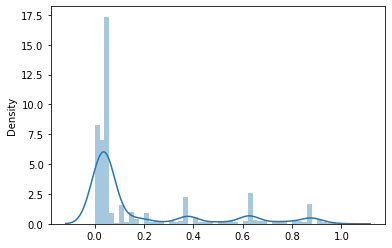

In [13]:
sns.distplot(train[target])

print("max : %f" %train[target].max())
print("min : %f" %train[target].min())
print('Skewness: %f' %train[target].skew())  #歪度
print('Kurtosis: %f' %train[target].kurt())  #尖度

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


log train Skewness: 1.407326
log train Kurtosis: 0.506788


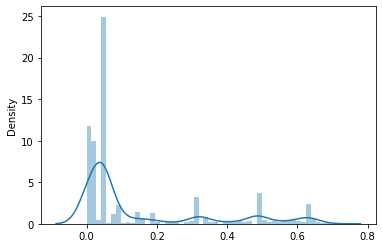

In [14]:
sns.distplot(np.log(train[target]+1))

print('log train Skewness: %f' %np.log(train[target]+1).skew())  #歪度
print('log train Kurtosis: %f' %np.log(train[target]+1).kurt())  #尖度

In [15]:
categorical_features = train.dtypes[train.dtypes=="object"].index

train[categorical_features].head()

,YMD,Landsat_StartTime,PRODUCT_ID,mesh20
0,20110926,02:15.1,LE07_L1TP_115043_20120118_20200909_02_T1,3725_10
1,2009.7.6-2009.7.28,45:26.6,LE07_L1TP_113041_20090706_20200911_02_T1,4027_13
2,20091014,46:43.0,LE07_L1TP_113042_20091229_20200911_02_T1,3927_22
3,2009.1.13-2009.2.19,NaN,NaN,4027_13
4,2009.1.13-2009.2.19,44:31.2,LE07_L1TP_113041_20081210_20200912_02_T1,4027_13


In [16]:
train_missing_50 = train_missing[train_missing.percent<0.3].index
test_missing_50 =  test_missing[test_missing.percent<0.3].index

features = set(train_missing_50) & set(test_missing_50)
features = set(features) - set(categorical_features) 

In [17]:
display(train[features])

,MED_IF_2016,MAX_Chlred_edge_2016,MED_Red_2006,MIN_Ferrous_Silicates_2008,MIN_CVI_2020,MED_Cirededge_2017,MAX_PSNDc2_2016,MIN_Cigreen_2001,MED_SLAVI_2006,MED_Gossan_2014,...,MED_DSWI_2019,MAX_CTVI_2005,MED_mCRIG_2001,MIN_SR672_708,MAX_TIRS2_2006,MED_Blue_2017,MED_Ferric_Oxides_2018,MAX_DSWI_2015,MIN_NormG_2019,MAX_NLI_2008
0,2.537836,2.718056,86.360860,0.020345,0.089984,-0.566736,-0.665066,-0.796401,16453.158823,0.073317,...,2.215253,0.510843,-0.090273,0.582260,8.784200,65.169533,0.120888,2.655716,0.385713,0.175092
1,3.509272,3.483540,26.171904,0.152305,0.093067,-0.586955,-0.145375,-0.716131,744.351131,0.028102,...,2.421090,0.461238,-0.114196,0.388942,8.259885,67.550980,0.075133,2.187090,0.357370,0.970890
2,3.209473,3.614910,39.305765,0.250048,0.050589,-0.680657,-0.308321,-0.801425,973.307728,0.038018,...,1.998866,0.639053,-0.058850,0.679001,8.392302,61.978100,0.144955,2.567921,0.541194,0.558546
3,3.068040,3.268113,NaN,NaN,0.043962,-0.634707,-0.795795,-0.776426,NaN,0.048208,...,3.311261,NaN,-0.099692,0.767689,NaN,65.034882,0.107269,3.122987,0.658877,NaN
4,2.788100,3.392867,16.375027,NaN,0.034838,-0.614252,-0.308942,-0.821655,151.936928,0.039440,...,4.129972,NaN,-0.086290,0.894985,8.194121,66.526955,0.083753,3.334987,0.711374,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14135,2.401048,2.528659,28.922357,0.207177,0.159633,-0.293800,-0.283737,-0.641953,623.095158,0.126068,...,2.244593,0.561514,-0.155558,0.838794,8.690779,73.255768,0.180680,2.509115,0.449475,0.926508
14136,3.843862,4.522329,99.690254,0.293170,0.029909,-0.615958,-0.328398,-0.561213,6945.763014,0.042255,...,2.548782,NaN,-0.137413,0.925403,7.373719,76.097244,0.154637,2.950518,0.650570,-0.102032
14137,2.895170,2.515602,21.671829,0.235487,0.053268,-0.562438,-0.465865,NaN,227.011126,0.069842,...,2.618769,0.423060,NaN,0.757444,8.671575,85.067825,0.139551,3.162169,0.563222,0.324021
14138,22.411268,2.588369,24.777781,NaN,0.139232,-0.519463,-0.509705,-0.713751,256.157434,0.065974,...,1.703505,NaN,-0.107908,0.889879,8.059268,108.414536,0.136013,2.079144,0.460941,NaN


## Model

In [18]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, GroupKFold, StratifiedGroupKFold
from sklearn.metrics import mean_squared_error

In [19]:
class CFG:
  ver=2
  model="lightgbm"
  n_folds=4
  trn_fold=[0, 1, 2, 3]
  seed=42
  target_cols="cover"
  boosting_type="gbdt"

In [20]:
# =========================================================================================
# CV split
# =========================================================================================
target_bins = [-1, .3, .5, .7, 1]
target_bin_name = ['0-0.3', '0.3-0.5', '0.5-0.7', '0.7-']
train["target_bins"] = pd.cut(train[target].cover, bins=target_bins, labels=target_bin_name)
bins_map = {'0-0.3':0, '0.3-0.5':1, '0.5-0.7':2, '0.7-':3}
train["bins"] = train["target_bins"].map(bins_map)

kfold = StratifiedKFold(n_splits = CFG.n_folds, shuffle = True, random_state = CFG.seed)
for num, (train_index, val_index) in enumerate(kfold.split(train.id, train["bins"])):
    train.loc[val_index, 'fold'] = int(num)
train['fold'] = train['fold'].astype(int)
display(train.groupby('fold').size())

fold
0    3535
1    3535
2    3535
3    3535
dtype: int64

In [21]:
features = list(features)
features.remove('id')

In [22]:
params = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.6
    }

===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 0.116356
RMSE : 0.11635573285124909
===============  FOLD : 1  ===============
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 0.113201
RMSE : 0.11320083481045644
===============  FOLD : 2  ===============
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 0.113045
RMSE : 0.11304541506414036
===============  FOLD : 3  ===============
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 0.114677
RMSE : 0.11467678969322376


,feature,importance
1561,month,0.008667
1139,warm_sst,0.007417
1354,hist_warm_sst,0.006500
892,depth,0.006417
1502,Date_Acquired,0.005333
333,sst_diff,0.005333
1637,lat,0.005083
471,sst_ymd,0.005000
845,fetch,0.004583
220,MIN_GARI,0.004583


CV Score: 0.11432750929949355


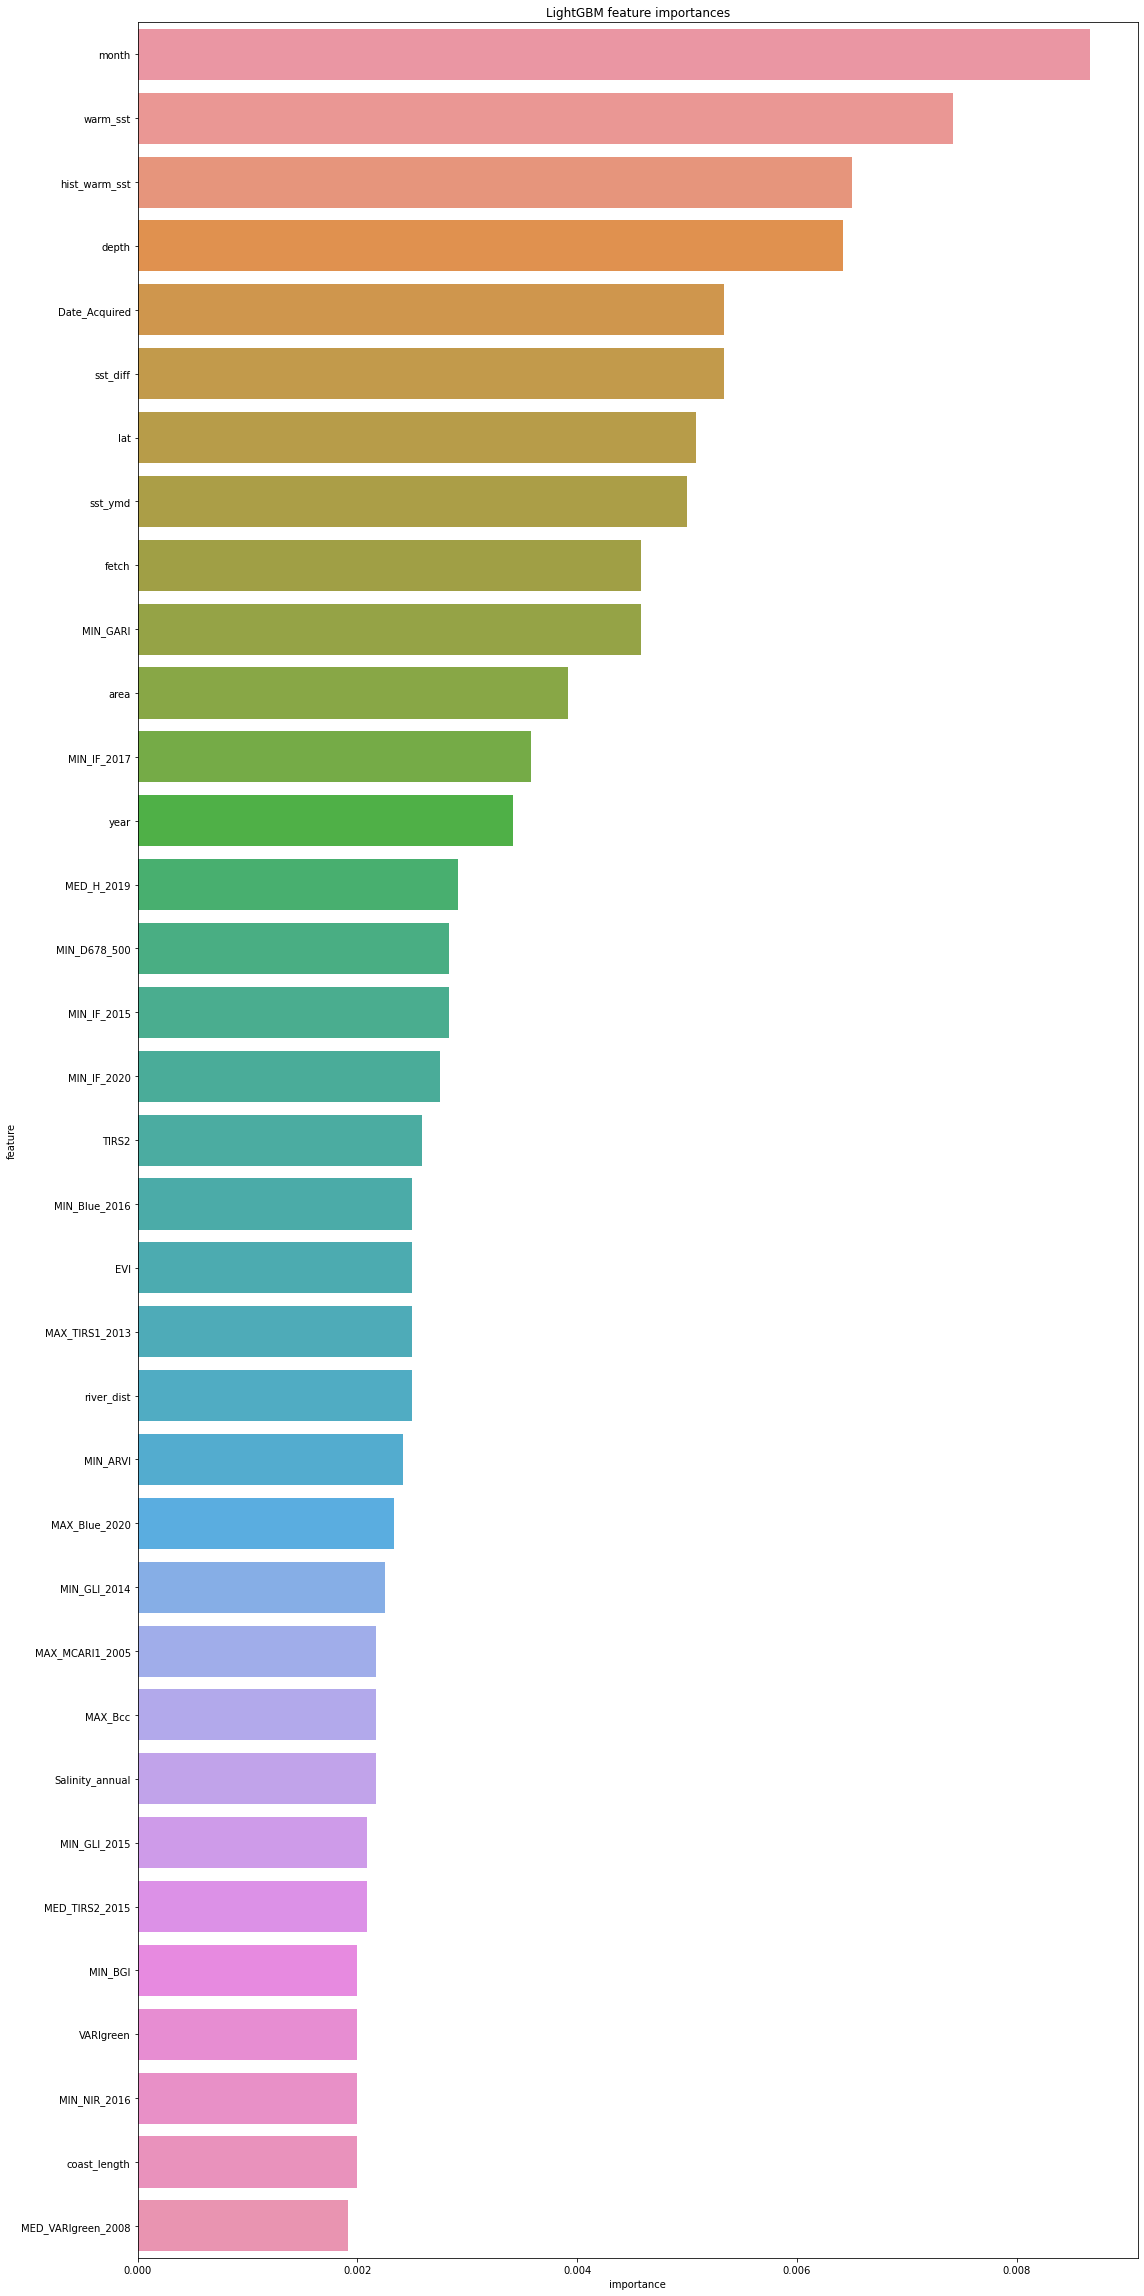

In [23]:
oof_df = pd.DataFrame()
df_importance = pd.DataFrame({'feature': features})
df_importance['importance'] = 0

for fold in range(CFG.n_folds):
  if fold in CFG.trn_fold:
    print("="*15,f" FOLD : {fold} ","="*15)
    train_folds = train[train['fold'] != fold].reset_index(drop=True)
    valid_folds = train[train['fold'] == fold].reset_index(drop=True)
    valid_labels = valid_folds[CFG.target_cols].values

    train_X = train_folds[features].values
    valid_X = valid_folds[features].values
    train_labels = train_folds[CFG.target_cols].values
    valid_labels = valid_folds[CFG.target_cols].values

    model = lgb.LGBMRegressor(**params)
    model.fit(train_X, train_labels,
            eval_set=[(valid_X, valid_labels)],
            eval_metric="rmse",
            verbose = 200,
            early_stopping_rounds=50)
    
    valid_folds["pred"] = model.predict(valid_X)
    oof_df = pd.concat([oof_df, valid_folds])

    f_importance = np.array(model.feature_importances_)
    temp_importance = pd.DataFrame({'feature': features, 'importance': f_importance})
    df_importance['importance'] += temp_importance['importance']

    score = np.sqrt(mean_squared_error(valid_labels, valid_folds["pred"]))
    print(f"RMSE : {score}")

df_importance['importance'] = df_importance['importance'] / np.sum(df_importance['importance'])
df_importance = df_importance.sort_values('importance', ascending=False)
best_features35 = df_importance.iloc[:35].feature.tolist()
best_features50 = df_importance.iloc[:50].feature.tolist()
display(df_importance.head(35))
fig = plt.figure(figsize=(16, 32), tight_layout=True)
sns.barplot(x="importance", y="feature", data=df_importance.head(35))
plt.title("LightGBM feature importances")
score = np.sqrt(mean_squared_error(oof_df[CFG.target_cols], oof_df["pred"]))
print(f'CV Score: {score}')

In [24]:
tmp_features = df_importance.loc[df_importance.importance>0].feature.tolist()
weak_features = set(tmp_features) - set(best_features35)
weak_features = list(weak_features)

oof_weak_df = pd.DataFrame()

params = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.1
    }

for fold in range(CFG.n_folds):
  if fold in CFG.trn_fold:
    print("="*15,f" FOLD : {fold} ","="*15)
    train_folds = train[train['fold'] != fold].reset_index(drop=True)
    valid_folds = train[train['fold'] == fold].reset_index(drop=True)
    valid_labels = valid_folds[CFG.target_cols].values

    train_X = train_folds[weak_features].values
    valid_X = valid_folds[weak_features].values
    train_labels = train_folds[CFG.target_cols].values
    valid_labels = valid_folds[CFG.target_cols].values

    model = lgb.LGBMRegressor(**params)
    model.fit(train_X, train_labels,
            eval_set=[(valid_X, valid_labels)],
            eval_metric="rmse",
            verbose = 200,
            early_stopping_rounds=50)
    
    valid_folds["weak_pred"] = model.predict(valid_X)
    oof_weak_df = pd.concat([oof_weak_df, valid_folds])

    score = np.sqrt(mean_squared_error(valid_labels, valid_folds["weak_pred"]))
    print(f"RMSE : {score}")

train = train.merge(oof_weak_df[["id","weak_pred"]],how="left",on="id")
score = np.sqrt(mean_squared_error(oof_weak_df[CFG.target_cols], oof_weak_df["weak_pred"]))
print(f'CV Score: {score}')

===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 0.123473
RMSE : 0.12347258280234687
===============  FOLD : 1  ===============
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 0.120807
RMSE : 0.1208066540448007
===============  FOLD : 2  ===============
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 0.1151
RMSE : 0.11510045118290665
===============  FOLD : 3  ===============
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 0.12074
RMSE : 0.12073975447196064
CV Score: 0.12006865592010324


===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[51]	valid_0's rmse: 0.1223
RMSE : 0.12229995797659378
===============  FOLD : 1  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's rmse: 0.121548
RMSE : 0.12154832048569592
===============  FOLD : 2  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[37]	valid_0's rmse: 0.114367
RMSE : 0.11436683083210587
===============  FOLD : 3  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[46]	valid_0's rmse: 0.119384
RMSE : 0.11938361331943163
CV Score: 0.11943983114706035


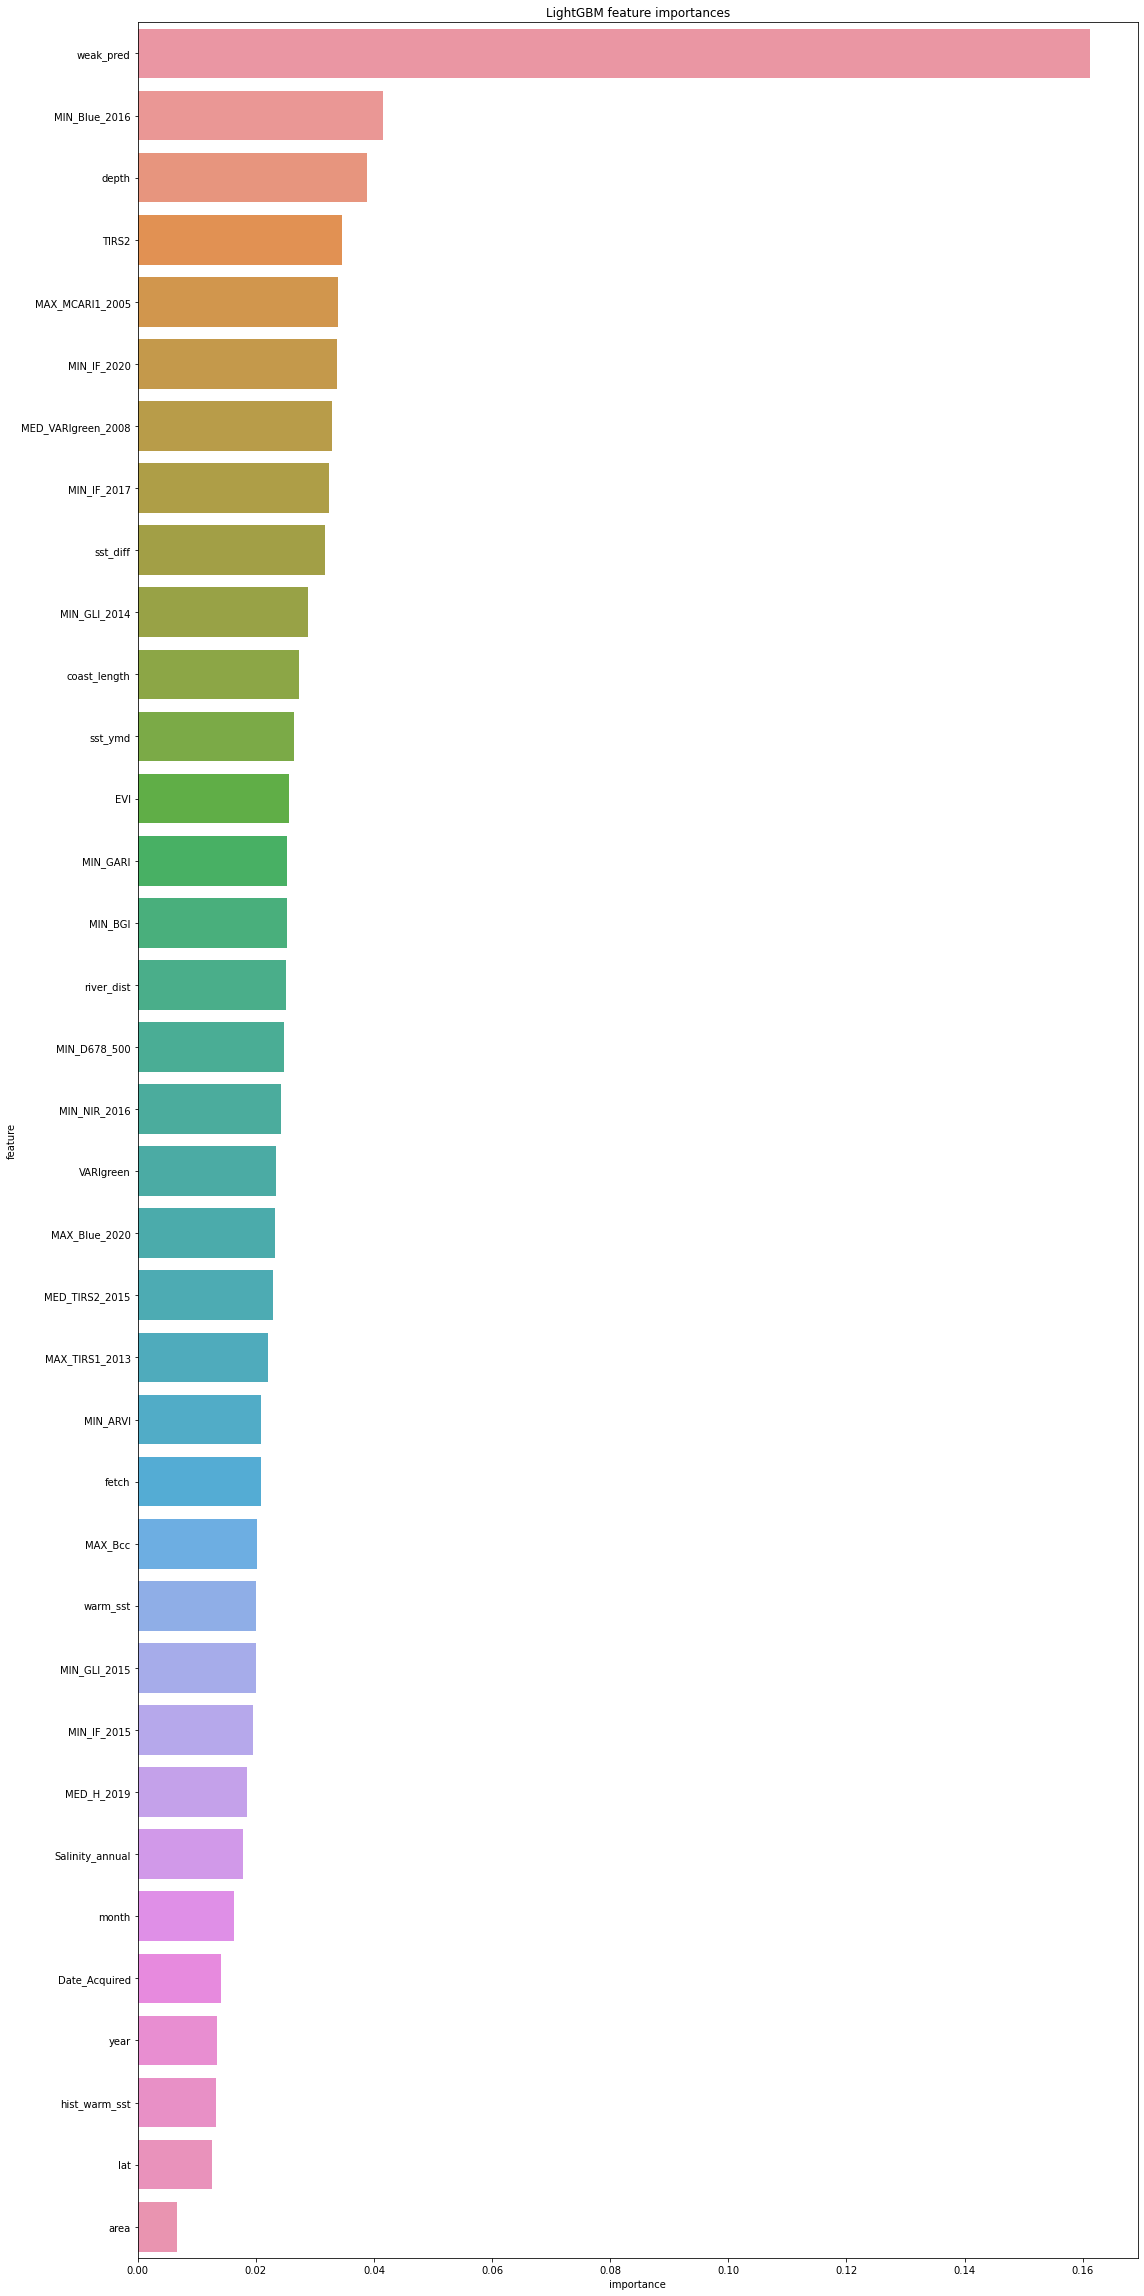

In [25]:
new_features = best_features35 + ["weak_pred"]
params = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.1
    }

oof_df = pd.DataFrame()
df_importance = pd.DataFrame({'feature': new_features})
df_importance['importance'] = 0

for fold in range(CFG.n_folds):
  if fold in CFG.trn_fold:
    print("="*15,f" FOLD : {fold} ","="*15)
    train_folds = train[train['fold'] != fold].reset_index(drop=True)
    valid_folds = train[train['fold'] == fold].reset_index(drop=True)
    valid_labels = valid_folds[CFG.target_cols].values

    train_X = train_folds[new_features].values
    valid_X = valid_folds[new_features].values
    train_labels = train_folds[CFG.target_cols].values
    valid_labels = valid_folds[CFG.target_cols].values

    model = lgb.LGBMRegressor(**params)
    model.fit(train_X, train_labels,
            eval_set=[(valid_X, valid_labels)],
            eval_metric="rmse",
            verbose = 200,
            early_stopping_rounds=50)
    
    valid_folds["pred"] = model.predict(valid_X)
    oof_df = pd.concat([oof_df, valid_folds])

    f_importance = np.array(model.feature_importances_)
    temp_importance = pd.DataFrame({'feature': new_features, 'importance': f_importance})
    df_importance['importance'] += temp_importance['importance']

    score = np.sqrt(mean_squared_error(valid_labels, valid_folds["pred"]))
    print(f"RMSE : {score}")

df_importance['importance'] = df_importance['importance'] / np.sum(df_importance['importance'])
df_importance = df_importance.sort_values('importance', ascending=False)
fig = plt.figure(figsize=(16, 32), tight_layout=True)
sns.barplot(x="importance", y="feature", data=df_importance.head(50))
plt.title("LightGBM feature importances")
score = np.sqrt(mean_squared_error(oof_df[CFG.target_cols], oof_df["pred"]))
print(f'CV Score: {score}')

In [26]:
params = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.1
    }

oof_df = pd.DataFrame()
test_preds = np.zeros((len(test), CFG.n_folds))

for fold in range(CFG.n_folds):
  if fold in CFG.trn_fold:
    print("="*15,f" FOLD : {fold} ","="*15)
    train_folds = train[train['fold'] != fold].reset_index(drop=True)
    valid_folds = train[train['fold'] == fold].reset_index(drop=True)
    valid_labels = valid_folds[CFG.target_cols].values

    train_X = train_folds[best_features50].values
    valid_X = valid_folds[best_features50].values
    test_X = test[best_features50].values
    train_labels = train_folds[CFG.target_cols].values
    valid_labels = valid_folds[CFG.target_cols].values

    model = lgb.LGBMRegressor(**params)
    model.fit(train_X, train_labels,
            eval_set=[(valid_X, valid_labels)],
            eval_metric="rmse",
            verbose = 200,
            early_stopping_rounds=50)
    
    valid_folds["pred"] = model.predict(valid_X)
    test_preds[:, fold] = model.predict(test_X)
    oof_df = pd.concat([oof_df, valid_folds])

    score = np.sqrt(mean_squared_error(valid_labels, valid_folds["pred"]))
    print(f"RMSE : {score}")

score = np.sqrt(mean_squared_error(oof_df[CFG.target_cols], oof_df["pred"]))
print(f'CV Score: {score}')
pd.DataFrame(np.mean(test_preds, axis=1)).to_csv(os.path.join(OUTPUT_DIR, f'submit_{CFG.model}_seed{CFG.seed}_ver{CFG.ver}.csv'), header=False)

===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 0.120554
RMSE : 0.12055401739045475
===============  FOLD : 1  ===============
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 0.119529
RMSE : 0.11952926066060376
===============  FOLD : 2  ===============
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 0.119775
RMSE : 0.11977493111023266
===============  FOLD : 3  ===============
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 0.120811
RMSE : 0.12081123733864793
CV Score: 0.12016853212551604
